<a href="https://colab.research.google.com/github/IISC-ICAIML-Project/Covid-19-Mortality-Prediction/blob/data_imbalance_resampling/Covid_19_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the tools

pandas, numpy and matplotlib for data analysis and manipulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Models from Scikit learn

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay 


## Data Exploration

In [4]:
# load the data into a data frame

df = pd.read_csv('https://github.com/IISC-ICAIML-Porject/Covid-19-Mortality-Prediction/blob/master/data/Covid%20Data.csv?raw=true',header=0)

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
df.shape

(1048575, 21)

### Data analysis and Understanding

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of **21 unique features** and **1,048,576 unique patients**. In the Boolean features, **1** means **"yes"** and **2** means **"no"**. values as **97** and **99** are **missing data**.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

<Axes: >

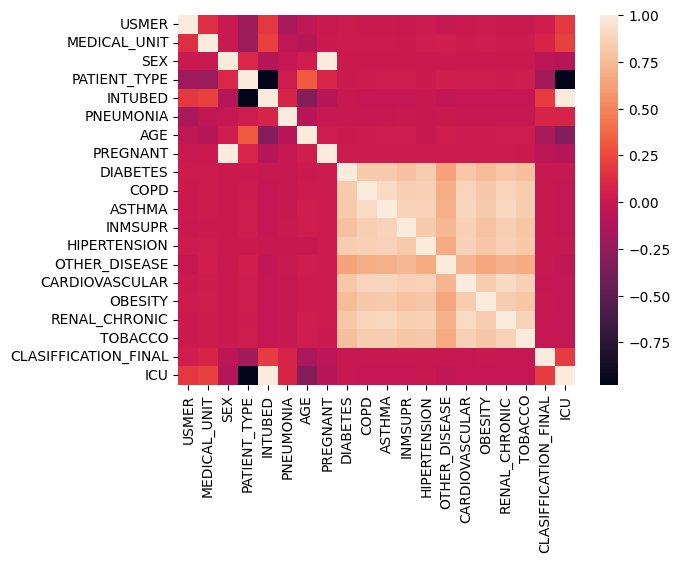

In [8]:
import seaborn as sns
sns.heatmap(data=df.drop(axis=1,columns='DATE_DIED').corr())

## Data Cleaning

We find the total number of missing values in each of the 21 features and corresponding percentage of missing value contributed by each of these features

In [9]:
df_reduced = df.copy()
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
missing_counts = df_reduced.isnull().sum()
invalid_counts = df_reduced.isin([97, 98, 99]).sum()
total_missing_counts = missing_counts + invalid_counts
perc_missing_values = round(total_missing_counts / len(df) * 100, 2)
missing_df = pd.DataFrame({'Feature': df_reduced.columns, 'NaN_count': missing_counts, '97_98_99_count': invalid_counts, 'Total_missing_count': total_missing_counts, 'Percentage_missing': perc_missing_values})
missing_df = missing_df.sort_values(by='Percentage_missing', ascending=False)

print(missing_df)

                                   Feature  NaN_count  97_98_99_count  \
ICU                                    ICU     856032               0   
INTUBED                            INTUBED     855869               0   
PREGNANT                          PREGNANT     527265               0   
PNEUMONIA                        PNEUMONIA      16003               0   
OTHER_DISEASE                OTHER_DISEASE       5045               0   
INMSUPR                            INMSUPR       3404               0   
DIABETES                          DIABETES       3338               0   
TOBACCO                            TOBACCO       3220               0   
HIPERTENSION                  HIPERTENSION       3104               0   
RENAL_CHRONIC                RENAL_CHRONIC       3006               0   
OBESITY                            OBESITY       3032               0   
CARDIOVASCULAR              CARDIOVASCULAR       3076               0   
COPD                                  COPD       30

New copy of the original dataframe is created . We get the count of unique values present in each column 

In [10]:
df_copy = df.copy()
df_copy.shape

for i in df.columns:
 print(df[i].value_counts())
 print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

### PREGNANT column cleaning

As Men cannot be PREGNANT, we convert all the 97(missing values) to 2(No) for all row values with SEX = 2(MALE) 

In [11]:
# replace all the missing values from PREGNANT column if Gender is MALE
print("in original dataset :\n",df_copy[(df_copy.SEX == 2)]['PREGNANT'].value_counts())

df_copy.loc[(df_copy.SEX == 2) & (df_copy.PREGNANT == 97), "PREGNANT"] = df_copy["PREGNANT"].replace(97, 2)

print("\n\nafter above step :\n",df_copy[(df_copy.SEX == 2)]['PREGNANT'].value_counts())

in original dataset :
 97    523511
Name: PREGNANT, dtype: int64


after above step :
 2    523511
Name: PREGNANT, dtype: int64


### CLASIFICATION_FINAL column cleaning

Consider the column CLASIFICATION_FINAL which describes if the patient is tested positive for Covid or was the test inconclusive.

For values >=4 i.e. 4,5,6,7 , the test is either negative or inconclusive, hence, we will replace it with 0("NO") 

For Values 1,2,3 the covid test is Positive, hence, we will replace it with 1("YES")

In [12]:
# Consider CLASSIFICATION column , replace all values >4 with 2("NO") since covid test is inconclusive 
print("\n\nas per original dataset :\n",df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"])

df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([4,5,6,7], 0)

print("Repacing 4,5,6,7 with 0 since covid test is inconclusive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

# Consider all values in [1,2,3] as tested positive for Covid-19 Virus
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 1), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([1,2,3], 1)

print("Repacing 1,2,3 with 1 since covid test is Positive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())



as per original dataset :
 1          5
3          7
42         5
43         5
44         5
          ..
1048570    7
1048571    7
1048572    7
1048573    7
1048574    7
Name: CLASIFFICATION_FINAL, Length: 656596, dtype: int64
Repacing 4,5,6,7 with 0 since covid test is inconclusive
 0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64
Repacing 1,2,3 with 1 since covid test is Positive
 0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64


### Basic Feature Selection

We filter out the columns which do not give us useful information 

MEDICAL_UNIT - no useful info can be got since it is not known what the enumerations {1, 2, ... 12, 13} mean.

ICU  and INTUBATED - Too many missing values.

In [13]:
Filtered_Cols=['USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL','PREGNANT']

df_reduced=df_copy[Filtered_Cols].copy()

In [14]:
# The shape of data frame after considering the filled values from different columns
original_number_of_datapoints = df.shape
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
df_reduced=df_reduced.dropna(axis=0)
print(df_reduced.head(),"\nreduced size after data cleaning: ",df_reduced.shape,
      "\noriginal size : ",original_number_of_datapoints)

   USMER  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  DIABETES  COPD  \
0      2    1             1  03/05/2020        1.0  65.0       2.0   2.0   
1      2    2             1  03/06/2020        1.0  72.0       2.0   2.0   
2      2    2             2  09/06/2020        2.0  55.0       1.0   2.0   
3      2    1             1  12/06/2020        2.0  53.0       2.0   2.0   
4      2    2             1  21/06/2020        2.0  68.0       1.0   2.0   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0     2.0      2.0           1.0            2.0             2.0      2.0   
1     2.0      2.0           1.0            2.0             2.0      1.0   
2     2.0      2.0           2.0            2.0             2.0      2.0   
3     2.0      2.0           2.0            2.0             2.0      2.0   
4     2.0      2.0           1.0            2.0             2.0      2.0   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  PREGNANT  
0            2.0      2.0 

### Target Cleaning

In [15]:
# "In data set 9999-99-99 indicates person is not died, so replacing these values with 0. Persons who really died has values 03-03-2020 format. So replacing data format values with 1. So 0 means died, 1 means not died in DATE_DIED column

df_reduced["DATE_DIED"] = [0 if each=="9999-99-99" else 1 for each in df_reduced.DATE_DIED]

In [16]:
for i in df_reduced.columns:
 print(df_reduced[i].value_counts())
 print('\n')

2    655933
1    365722
Name: USMER, dtype: int64


2    511795
1    509860
Name: SEX, dtype: int64


1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


2.0    884402
1.0    137253
Name: PNEUMONIA, dtype: int64


30.0     26456
31.0     25419
28.0     24735
29.0     24595
34.0     24406
         ...  
115.0        2
119.0        2
111.0        1
121.0        1
113.0        1
Name: AGE, Length: 118, dtype: int64


2.0    899531
1.0    122124
Name: DIABETES, dtype: int64


2.0    1007356
1.0      14299
Name: COPD, dtype: int64


2.0    991243
1.0     30412
Name: ASTHMA, dtype: int64


2.0    1008105
1.0      13550
Name: INMSUPR, dtype: int64


2.0    862521
1.0    159134
Name: HIPERTENSION, dtype: int64


2.0    994597
1.0     27058
Name: OTHER_DISEASE, dtype: int64


2.0    1001613
1.0      20042
Name: CARDIOVASCULAR, dtype: int64


2.0    865081
1.0    156574
Name: OBESITY, dtype: int64


2.0    1003350
1.0      18305
Name

In [17]:
num_died = (df_reduced['DATE_DIED'] == 1).sum()
num_not_died = (df_reduced['DATE_DIED'] == 0).sum()
perc_died = num_died / len(df_reduced) * 100
perc_not_died = num_not_died / len(df_reduced) * 100

# Print the results
print("Number of people who died:", num_died)
print("Number of people who did not die:", num_not_died)
print("Percentage of people who died:", perc_died, "%")
print("Percentage of people who did not die:", perc_not_died, "%")

Number of people who died: 74555
Number of people who did not die: 947100
Percentage of people who died: 7.2974732174755665 %
Percentage of people who did not die: 92.70252678252443 %


### PATIENT_TYPE Column cleaning

Consider the column 'PATIENT_TYPE' . 

It describes whether the patient returned home (1) or hosptialized (2) 
we will change the feature name to Hospitalized and have Yes as 1 No as 0

In [18]:
print("\n\nas per reduced dataset number of samples with patient type 1 and 2 :" , df_reduced["PATIENT_TYPE"].value_counts())

df_reduced.loc[(df_reduced.PATIENT_TYPE == 1), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(1, 0)
df_reduced.loc[(df_reduced.PATIENT_TYPE == 2), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(2, 1)

print("\n\nafter above steps, number of samples with patient type 1 and 2 :" , df_reduced["PATIENT_TYPE"].value_counts())



as per reduced dataset number of samples with patient type 1 and 2 : 1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


after above steps, number of samples with patient type 1 and 2 : 0    830233
1    191422
Name: PATIENT_TYPE, dtype: int64


### Convert to Binary Feature Vectors

Convert all 2(No) and 1(Yes) Values to binary  0(No) and 1(Yes)

In [19]:
df_final = df_reduced.copy()
for col in df_final.columns:
  df_final = df_final.replace(2,0)

df_final = df_final.astype(int)
df_final

,USMER,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT
0,0,1,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,1,72,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,0,55,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,53,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,68,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
1048571,1,0,1,0,0,51,0,0,0,0,1,0,0,0,0,0,0,0
1048572,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
for i in df_final.columns:
 print(df_final[i].value_counts())
 print('\n')

0    655933
1    365722
Name: USMER, dtype: int64


0    511795
1    509860
Name: SEX, dtype: int64


0    830233
1    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


0    884402
1    137253
Name: PNEUMONIA, dtype: int64


30     26456
31     25419
28     24735
29     24595
34     24406
       ...  
115        2
119        2
111        1
121        1
113        1
Name: AGE, Length: 117, dtype: int64


0    899531
1    122124
Name: DIABETES, dtype: int64


0    1007356
1      14299
Name: COPD, dtype: int64


0    991243
1     30412
Name: ASTHMA, dtype: int64


0    1008105
1      13550
Name: INMSUPR, dtype: int64


0    862521
1    159134
Name: HIPERTENSION, dtype: int64


0    994597
1     27058
Name: OTHER_DISEASE, dtype: int64


0    1001613
1      20042
Name: CARDIOVASCULAR, dtype: int64


0    865081
1    156574
Name: OBESITY, dtype: int64


0    1003350
1      18305
Name: RENAL_CHRONIC, dtype: int64


0    939141
1     82514
Name: 

### Applying one hot encoding to AGE and SEX Columns



In [21]:
age_bins = [0, 20, 40, 60, 80, 100, 120]
age_labels = ['0-20', '20-40', '40-60', '60-80','80-100','100-120']
df_final['AGE_GROUP'] = pd.cut(df_final['AGE'], bins=age_bins, labels=age_labels)

# Apply one hot encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(df_final['AGE_GROUP'], prefix='AGE')

# Concatenate the original dataframe with the one hot encoded dataframe
df_final = pd.concat([df_final, one_hot_encoded], axis=1)

# Drop the original "AGE" and "AGE_GROUP" columns
df_final.drop(['AGE', 'AGE_GROUP'], axis=1, inplace=True)

gender_one_hot = pd.get_dummies(df_final['SEX'], prefix='GENDER', prefix_sep='')
df_final = pd.concat([df_final, gender_one_hot], axis=1)
df_final.drop(['SEX'], axis=1, inplace=True)

df_final = df_final.rename(columns={'PATIENT_TYPE':'HOSPITALIZED', 'DATE_DIED':'DEATH','CLASIFFICATION_FINAL':'COVID-TEST','GENDER0':'MALE','GENDER1':'FEMALE'})


In [22]:
df_final.head()

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [23]:
for i in df_final.columns:
 print(df_final[i].value_counts())
 print('\n')

0    655933
1    365722
Name: USMER, dtype: int64


0    830233
1    191422
Name: HOSPITALIZED, dtype: int64


0    947100
1     74555
Name: DEATH, dtype: int64


0    884402
1    137253
Name: PNEUMONIA, dtype: int64


0    899531
1    122124
Name: DIABETES, dtype: int64


0    1007356
1      14299
Name: COPD, dtype: int64


0    991243
1     30412
Name: ASTHMA, dtype: int64


0    1008105
1      13550
Name: INMSUPR, dtype: int64


0    862521
1    159134
Name: HIPERTENSION, dtype: int64


0    994597
1     27058
Name: OTHER_DISEASE, dtype: int64


0    1001613
1      20042
Name: CARDIOVASCULAR, dtype: int64


0    865081
1    156574
Name: OBESITY, dtype: int64


0    1003350
1      18305
Name: RENAL_CHRONIC, dtype: int64


0    939141
1     82514
Name: TOBACCO, dtype: int64


0    634185
1    387470
Name: COVID-TEST, dtype: int64


0    1013814
1       7841
Name: PREGNANT, dtype: int64


0    956305
1     65350
Name: AGE_0-20, dtype: int64


0    580748
1    440907
Name: AGE_20-40, dt

<Axes: >

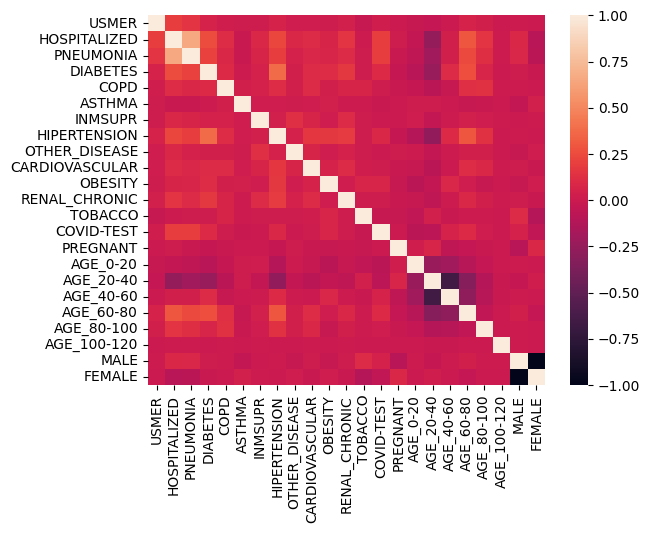

In [24]:
sns.heatmap(data=df_final.drop(axis=1,columns='DEATH').corr())

<Axes: >

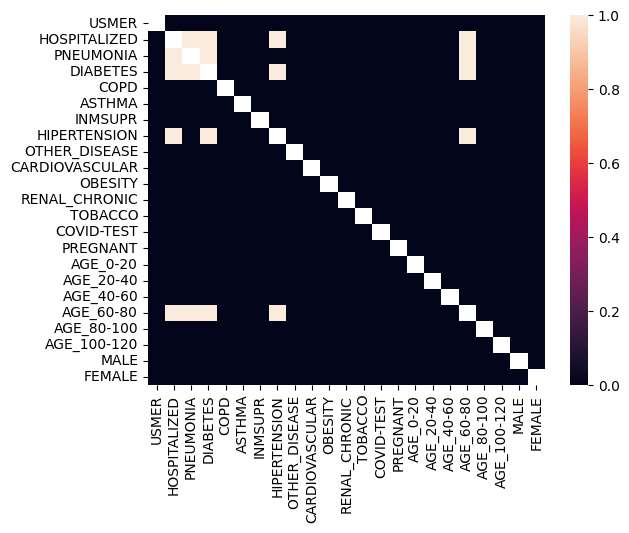

In [25]:
corr_matrix = df_final.drop(axis=1,columns='DEATH').corr() > 0.2
mask = np.eye(len(corr_matrix))
sns.heatmap(data=corr_matrix, mask= mask)

# Data Preparation for Model training

In [108]:
# get 3 sets of data - train , val , test

X = df_final.drop("DEATH", axis=1)
y = df_final["DEATH"]

# this split gives 2 sets for training and final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, X_test.shape)

(766241, 23) (255414, 23)


In [109]:
y_train.value_counts(), y_test.value_counts()

(0    710305
 1     55936
 Name: DEATH, dtype: int64,
 0    236795
 1     18619
 Name: DEATH, dtype: int64)

Henceforth , we will only use X_train for hyperparameter tuning.
X_test will be reserved only for validating the performance metrics on the final models.

## Feature Extraction 

### Using Random Forest to get the best Features

In [28]:
from sklearn.ensemble import RandomForestClassifier

# X is the binary feature matrix, y is the target variable
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
importances = clf.feature_importances_


In [29]:
important_features = dict(zip(X_train.columns,importances))
important_features = dict(sorted(important_features.items(), key=lambda x: x[1], reverse=True))
print(important_features)

{'HOSPITALIZED': 0.36066454289437605, 'PNEUMONIA': 0.2254113763588142, 'AGE_60-80': 0.06986596952774965, 'COVID-TEST': 0.06707369096070032, 'HIPERTENSION': 0.03522493339755092, 'AGE_20-40': 0.03267789586075625, 'DIABETES': 0.0325521633296528, 'AGE_80-100': 0.024385586261320095, 'USMER': 0.01887879954900858, 'AGE_40-60': 0.016900068291289372, 'OBESITY': 0.015405002348955234, 'RENAL_CHRONIC': 0.014267080150416538, 'TOBACCO': 0.012354817780069879, 'OTHER_DISEASE': 0.012348810226483029, 'CARDIOVASCULAR': 0.011878730473810386, 'COPD': 0.01090525056041278, 'INMSUPR': 0.010368190853235582, 'AGE_0-20': 0.00830882984423861, 'ASTHMA': 0.006952100550351863, 'FEMALE': 0.006575278981939735, 'MALE': 0.006053263914809031, 'PREGNANT': 0.0008089222475130348, 'AGE_100-120': 0.00013869563654600838}


In [30]:
np.cumsum(list(important_features.values()))

array([0.36066454, 0.58607592, 0.65594189, 0.72301558, 0.75824051,
       0.79091841, 0.82347057, 0.84785616, 0.86673496, 0.88363503,
       0.89904003, 0.91330711, 0.92566193, 0.93801074, 0.94988947,
       0.96079472, 0.97116291, 0.97947174, 0.98642384, 0.99299912,
       0.99905238, 0.9998613 , 1.        ])

Text(0, 0.5, 'Importance of cumulative features')

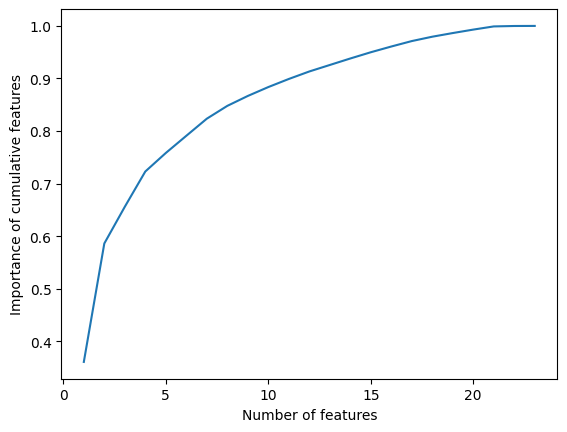

In [31]:
plt.plot(range(1, len(X_train.columns)+1), np.cumsum(list(important_features.values())))
plt.xlabel("Number of features")
plt.ylabel("Importance of cumulative features")

Choose best k features such that importance adds up to 0.9

In [32]:
best_features = list(important_features.keys())[:np.argmax(np.cumsum(list(important_features.values())) >= 0.9)+1]
best_features

['HOSPITALIZED',
 'PNEUMONIA',
 'AGE_60-80',
 'COVID-TEST',
 'HIPERTENSION',
 'AGE_20-40',
 'DIABETES',
 'AGE_80-100',
 'USMER',
 'AGE_40-60',
 'OBESITY',
 'RENAL_CHRONIC']

In [34]:
X_train_feature_reduced = X_train[best_features].copy()
y_train_feature_reduced = y_train.copy()
X_test_feature_reduced = X_test[best_features].copy()
y_test_feature_reduced = y_test.copy()

## Resolving Data Imbalance

### SMOTE Method from imblearn

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline as imbPipeline

In [285]:
def data_sampling_smote(X,y, undersample_ratio = 0.2, oversample_ratio = 0.5, random_seed = 2023):
  # Define the undersampler and oversampler as part of a pipeline
  undersampler = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=random_seed)
  oversampler = SMOTE(sampling_strategy=oversample_ratio, random_state=random_seed)
  pipeline = imbPipeline(steps=[('u', undersampler), ('o', oversampler)])

  # Apply the pipeline to the imbalanced dataset
  X_SMOTE, y_SMOTE = pipeline.fit_resample(X, y)
  return X_SMOTE, y_SMOTE

X_train_SMOTE, y_train_SMOTE = data_sampling_smote(X_train, y_train)
# Print the class distribution after balancing
print("Class distribution after balancing:", np.bincount(y_train_SMOTE))

print(X_train_SMOTE.shape)

Class distribution after balancing: [279680 139840]
(419520, 23)


In [37]:
print(y_train_SMOTE.value_counts())

0    278920
1    139460
Name: DEATH, dtype: int64


In [38]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)

In [39]:
X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE = data_sampling_smote(X_train_feature_reduced, y_train)

In [40]:
print(y_train_feature_reduced_SMOTE.value_counts())

0    278920
1    139460
Name: DEATH, dtype: int64


## Modeling

### Standard Models

#### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression(penalty='l2', solver='liblinear')

# Set the hyperparameter search space
param_grid = {'C': [0.1, 1, 10]}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5 , scoring=['f1','accuracy', 'precision','recall'], refit = 'f1')

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)


Best hyperparameters:  {'C': 10}
Best score:  0.4886799156899442


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,3.828966,0.238984,0.255324,0.046707,0.1,{'C': 0.1},0.488294,0.493583,0.490033,0.485007,...,0.004560,1,0.416868,0.422284,0.415345,0.414628,0.409877,0.415800,0.003996,3
1,4.346995,0.376015,0.261898,0.043338,1,{'C': 1},0.488532,0.493769,0.490731,0.485147,...,0.004569,2,0.417137,0.422643,0.416420,0.414986,0.410415,0.416320,0.003932,2
2,4.832922,0.530251,0.253769,0.047556,10,{'C': 10},0.488532,0.493743,0.490811,0.485147,...,0.004575,3,0.417137,0.422643,0.416510,0.414986,0.410415,0.416338,0.003933,1


In [42]:
# Fit the GridSearchCV object to the data
grid.fit(X_train_feature_reduced, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Best hyperparameters:  {'C': 1}
Best score:  0.47547299561958417


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,2.333339,0.242637,0.221635,0.031769,0.1,{'C': 0.1},0.480277,0.473429,0.476196,0.476231,...,0.006592,1,0.403782,0.394496,0.39222,0.400914,0.388456,0.395974,0.005625,3
1,2.498290,0.203979,0.234669,0.048801,1,{'C': 1},0.480571,0.473429,0.476196,0.476261,...,0.006685,2,0.404589,0.394496,0.39222,0.401004,0.388456,0.396153,0.005868,1
2,2.749986,0.498869,0.220048,0.022668,10,{'C': 10},0.480571,0.473429,0.476196,0.476261,...,0.006685,2,0.404589,0.394496,0.39222,0.401004,0.388456,0.396153,0.005868,1


In [43]:
# Fit the GridSearchCV object to the data
grid.fit(X_train_SMOTE, y_train_SMOTE)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Best hyperparameters:  {'C': 10}
Best score:  0.841396779742705


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,2.059262,0.114175,0.190470,0.033320,0.1,{'C': 0.1},0.840649,0.842007,0.843562,0.839142,...,0.00115,3,0.856231,0.861071,0.863402,0.856697,0.858311,0.859142,0.002721,1
1,2.017407,0.144387,0.172534,0.031320,1,{'C': 1},0.840695,0.841878,0.843669,0.839456,...,0.00124,2,0.856052,0.860713,0.863330,0.857378,0.858024,0.859099,0.002604,3
2,2.292711,0.074675,0.176419,0.020845,10,{'C': 10},0.840715,0.841878,0.843669,0.839491,...,0.00123,1,0.856088,0.860713,0.863330,0.857414,0.858060,0.859121,0.002588,2


In [44]:
# Fit the GridSearchCV object to the data
grid.fit(X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Best hyperparameters:  {'C': 0.1}
Best score:  0.839679581266572


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.988979,0.201042,0.137915,0.005875,0.1,{'C': 0.1},0.840292,0.840261,0.837538,0.840714,...,0.001598,3,0.856877,0.855550,0.851606,0.854188,0.856841,0.855012,0.001969,1
1,0.936412,0.138504,0.171955,0.036312,1,{'C': 1},0.840292,0.840220,0.837527,0.840738,...,0.001637,1,0.856877,0.855478,0.851534,0.854152,0.856912,0.854991,0.002007,2
2,0.925451,0.052612,0.141560,0.008479,10,{'C': 10},0.840292,0.840220,0.837527,0.840738,...,0.001637,1,0.856877,0.855478,0.851534,0.854152,0.856912,0.854991,0.002007,2


Best Results are obtained for the model trained on Resampled training data and hence we will get the performance metrics for the same 

In [45]:
best_lr = LogisticRegression(penalty='l2', solver='liblinear', C=1)

best_lr.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = best_lr.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    236643
           1       0.43      0.86      0.57     18771

    accuracy                           0.90    255414
   macro avg       0.71      0.88      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[214975  21668]
 [  2658  16113]]


In [46]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=1)

best_lr2.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = best_lr2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    236643
           1       0.43      0.86      0.57     18771

    accuracy                           0.90    255414
   macro avg       0.71      0.88      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[214972  21671]
 [  2659  16112]]


##### Observations


We see that even though the scores for the best models are high , on the Test set, the precision is quite low and recall is high for the positive samples (Samples where patients have died due to covid).

Number of flase positives is greater than the number of true positives which is not a sign of a good model

We would want to have a better precision compared to the best Logistsic regression model

####XGBoost

In [49]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3,20],
    'min_samples_leaf': [2,11]
}
# Create XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=20, min_samples_split=11)

# Create GridSearchCV object
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring=['f1','accuracy','precision', 'recall'], refit='f1', cv=5)


In [365]:
# Fit the model
grid.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

[15:45:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:45:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:45:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:45:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:46:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:46:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:46:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:46:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:46:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_f1,split1_test_f1,split2_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,10.004291,0.620377,0.225916,0.006277,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.449491,0.452013,0.445683,...,0.008558,1,0.344982,0.348110,0.346501,0.329431,0.362588,0.346322,0.010535,3
1,9.969363,0.552295,0.238792,0.023797,3,11,"{'max_depth': 3, 'min_samples_leaf': 11}",0.449491,0.452013,0.445683,...,0.008558,1,0.344982,0.348110,0.346501,0.329431,0.362588,0.346322,0.010535,3
2,65.936904,0.614866,0.411137,0.009094,20,2,"{'max_depth': 20, 'min_samples_leaf': 2}",0.472809,0.477802,0.459808,...,0.008893,3,0.387345,0.394852,0.378050,0.394226,0.382787,0.387452,0.006494,1
3,66.045431,0.941801,0.412101,0.008134,20,11,"{'max_depth': 20, 'min_samples_leaf': 11}",0.472809,0.477802,0.459808,...,0.008893,3,0.387345,0.394852,0.378050,0.394226,0.382787,0.387452,0.006494,1


Best model is got with hyperparameters {'max_depth': 20, 'min_samples_leaf': 2 or 11}
we wil fit the training set with this model and observe the classification report 

In [50]:
xgb_best_model = xgb.XGBClassifier(n_estimators=20, min_samples_split=11, max_depth= 20, min_samples_leaf= 2)

X_train, y_train = shuffle(X_train, y_train, random_state=2023)
xgb_best_model.fit(X_train, y_train)

y_pred = xgb_best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[17:22:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236643
           1       0.60      0.37      0.46     18771

    accuracy                           0.94    255414
   macro avg       0.77      0.68      0.71    255414
weighted avg       0.93      0.94      0.93    255414

[[231918   4725]
 [ 11752   7019]]


In [52]:
X_train_feature_reduced , y_train_feature_reduced = shuffle(X_train_feature_reduced , y_train_feature_reduced, random_state=2023)
xgb_best_model.fit(X_train_feature_reduced , y_train_feature_reduced)

y_pred = xgb_best_model.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

[17:27:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236643
           1       0.62      0.36      0.46     18771

    accuracy                           0.94    255414
   macro avg       0.79      0.67      0.71    255414
weighted avg       0.93      0.94      0.93    255414

[[232491   4152]
 [ 12017   6754]]


In [53]:
X_train_SMOTE , y_train_SMOTE = shuffle(X_train_SMOTE , y_train_SMOTE, random_state=2023)
xgb_best_model.fit(X_train_SMOTE , y_train_SMOTE)

y_pred = xgb_best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[17:28:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    236643
           1       0.41      0.89      0.56     18771

    accuracy                           0.90    255414
   macro avg       0.70      0.89      0.75    255414
weighted avg       0.95      0.90      0.91    255414

[[212399  24244]
 [  2113  16658]]


In [54]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)

xgb_best_model.fit(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE)

y_pred = xgb_best_model.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

[17:30:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236643
           1       0.40      0.92      0.55     18771

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.75    255414
weighted avg       0.95      0.89      0.91    255414

[[210400  26243]
 [  1535  17236]]


##### Observations

As we use the originl preprocessed dataset without feature reduction or oversampling we see that the precision values are high which is needed but the recall is pretty and this is also similar in case of feature reduced dataset 

However when we resample and train the model , it suddenly has very high recall and low precision value . Indicating it maybe overfitting due to increased positive samples 

Even though the XGBoost gives us better results compared to logisitic regression , the time to train is more compared to logistic regression and as mentioned above , it is sensitive to data resampling

####Decision Trees

In [56]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 
def fitting(X_in, y, X_test, y_test, criterion, splitter, mdepth, clweight, minleaf):
 
 # Fit the model
 model = DecisionTreeClassifier(criterion=criterion, 
 splitter=splitter, 
 max_depth=mdepth,
 class_weight=clweight,
 min_samples_leaf=minleaf, 
 random_state=0, 
 )
 clf = model.fit(X_in, y)
 
 # Predict class labels on training data
 pred_labels_tr = model.predict(X_test)
 
 # Use score method to get accuracy of the model
 print('*************** Tree Summary ***************')
 print('Classes: ', clf.classes_)
 print('Tree Depth: ', clf.tree_.max_depth)
 print('No. of leaves: ', clf.tree_.n_leaves)
 print('No. of features: ', X_in.shape[1])
 print('--------------------------------------------------------')
 print("")
 
 print('*************** Evaluation on Training Data ***************')
 score_tr = model.score(X_test, y_test)
 print('Accuracy Score: ', score_tr)
 # Look at classification report to evaluate the model
 print(classification_report(y_test, pred_labels_tr))
 print('--------------------------------------------------------')
 
 # Return relevant data for chart plotting
 return clf
 


In [57]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)
clf = fitting(X_train, y_train, X_test, y_test,'entropy', 'best', mdepth=5, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  32
No. of features:  23
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.935821842185628
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    236643
           1       0.65      0.27      0.38     18771

    accuracy                           0.94    255414
   macro avg       0.80      0.63      0.67    255414
weighted avg       0.92      0.94      0.92    255414

--------------------------------------------------------


In [58]:
X_train_feature_reduced, y_train_feature_reduced = shuffle(
    X_train_feature_reduced, y_train_feature_reduced, random_state=2023)

clf = fitting(X_train_feature_reduced, y_train_feature_reduced, 
              X_test_feature_reduced, y_test_feature_reduced ,'entropy', 'best', mdepth=10, clweight=None, minleaf=15)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  10
No. of leaves:  549
No. of features:  12
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9366518671646816
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236643
           1       0.62      0.37      0.46     18771

    accuracy                           0.94    255414
   macro avg       0.78      0.67      0.71    255414
weighted avg       0.93      0.94      0.93    255414

--------------------------------------------------------


In [59]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)
clf = fitting(X_train_SMOTE, y_train_SMOTE, X_test, y_test,'entropy', 'best', mdepth=5, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  32
No. of features:  23
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8887531615338236
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236643
           1       0.39      0.92      0.55     18771

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.74    255414
weighted avg       0.95      0.89      0.91    255414

--------------------------------------------------------


In [60]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)
clf = fitting(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, X_test_feature_reduced, y_test,'entropy', 'best', mdepth=5, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  32
No. of features:  12
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8792783480936832
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    236643
           1       0.37      0.93      0.53     18771

    accuracy                           0.88    255414
   macro avg       0.68      0.90      0.73    255414
weighted avg       0.95      0.88      0.90    255414

--------------------------------------------------------


##### Observations

The results of DT are similar to that of Logisitic regression and we see that the timing for computation is significantly less compared to XGBoost 

However, the model is very sensitive towards data resampling as recall is extremely high while precision is very low in case of resampled dataset 

This could still be considered for modelling purpose as it has the added advantage of good accuracy and precision values when data is not resampled along with lesser computation time

Logistic Regression< XGBoost <= Decision Trees

### Custom Models

#### Classifier- Classifier Ensemble 

In [61]:
def print_scoring_reports(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  print(classification_report(y_true, y_pred))
  print("Confusion matrix:\n", cm)

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def custom_ensemble_1(X, y, gridsearch=True, X_val=None, y_val=None):

  # separate positive and negative samples
  X_train_pos = X[y == 0]
  y_train_pos = y[y == 0]
  X_train_neg = X[y == 1]
  y_train_neg = y[y == 1]

  print(y_train_neg.shape)
  # Define individual classifiers
  clf1 = make_pipeline(DecisionTreeClassifier(random_state=2023, 
                                              splitter='best',
                                              criterion='entropy',
                                              min_samples_leaf=10, 
                                              max_depth=5))
  clf2 = make_pipeline(DecisionTreeClassifier(random_state=2023, 
                                              splitter='best',
                                              criterion='entropy',
                                              min_samples_leaf=10, 
                                              max_depth=5))

  # Fit classifiers on masked data
  clf1.fit(X_train_pos, y_train_pos)
  clf2.fit(X_train_neg, y_train_neg)

  # Define the ensemble model
  ensemble_model = VotingClassifier(estimators=[
      ('clf1', clf1),
      ('clf2', clf2)],
  voting='soft'
  )
  
  if gridsearch == True:
    param_grid = {}
    # Create GridSearchCV object
    grid = GridSearchCV(estimator=ensemble_model,  param_grid = param_grid,
                            scoring=['f1','accuracy','precision', 'recall'], refit='f1', cv=5)
    
    grid.fit(X,y)
    # Print best hyperparameters and corresponding score
    print("Best parameters: ", grid.best_params_)
    print("Best score: ", grid.best_score_)
    return pd.DataFrame(grid.cv_results_)
  else:
    ensemble_model.fit(X, y)
    y_pred_train = ensemble_model.predict(X)
    y_pred_proba = ensemble_model.predict_proba(X_val)
    y_pred = ensemble_model.predict(X_val)
    return y_pred, y_pred_proba, y_pred_train



In [73]:
custom_ensemble_1(X_train, y_train, True)

(55784,)
Best parameters:  {}
Best score:  0.3954235293562033


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,2.379119,0.448439,0.253055,0.063387,{},0.387455,0.410913,0.38746,0.407985,0.383306,...,0.01633,1,0.272385,0.305127,0.274715,0.301335,0.270413,0.284795,0.015162,1


In [74]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)
y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(X_train, y_train, False, X_test, y_test)
print_scoring_reports(y_test, y_pred)
print_scoring_reports(y_train, y_pred_train)

(55784,)
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    236643
           1       0.65      0.27      0.38     18771

    accuracy                           0.94    255414
   macro avg       0.80      0.63      0.67    255414
weighted avg       0.92      0.94      0.92    255414

Confusion matrix:
 [[233952   2691]
 [ 13701   5070]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    710457
           1       0.66      0.27      0.38     55784

    accuracy                           0.94    766241
   macro avg       0.80      0.63      0.68    766241
weighted avg       0.92      0.94      0.92    766241

Confusion matrix:
 [[702577   7880]
 [ 40622  15162]]


In [75]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)
y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(X_train_SMOTE, y_train_SMOTE, False, X_test, y_test)
print_scoring_reports(y_test, y_pred)
print_scoring_reports(y_train_SMOTE, y_pred_train)

(139460,)
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236643
           1       0.39      0.92      0.55     18771

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.74    255414
weighted avg       0.95      0.89      0.91    255414

Confusion matrix:
 [[209767  26876]
 [  1538  17233]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92    278920
           1       0.80      0.92      0.86    139460

    accuracy                           0.90    418380
   macro avg       0.88      0.90      0.89    418380
weighted avg       0.91      0.90      0.90    418380

Confusion matrix:
 [[247464  31456]
 [ 10981 128479]]


In [76]:
X_train_feature_reduced , y_train_feature_reduced = shuffle(
    X_train_feature_reduced , y_train_feature_reduced, random_state=2023)

y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(
    X_train_feature_reduced , y_train_feature_reduced, False, X_test_feature_reduced, y_test_feature_reduced)

print_scoring_reports(y_test_feature_reduced , y_pred)
print_scoring_reports(y_train_feature_reduced, y_pred_train)

(55784,)
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    236643
           1       0.65      0.27      0.38     18771

    accuracy                           0.94    255414
   macro avg       0.80      0.63      0.67    255414
weighted avg       0.92      0.94      0.92    255414

Confusion matrix:
 [[233952   2691]
 [ 13701   5070]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    710457
           1       0.66      0.27      0.38     55784

    accuracy                           0.94    766241
   macro avg       0.80      0.63      0.68    766241
weighted avg       0.92      0.94      0.92    766241

Confusion matrix:
 [[702577   7880]
 [ 40622  15162]]


In [78]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)

y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, False, 
    X_test_feature_reduced, y_test_feature_reduced)

print_scoring_reports(y_test_feature_reduced , y_pred)
print_scoring_reports(y_train_feature_reduced_SMOTE, y_pred_train)

(139460,)
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    236643
           1       0.37      0.93      0.53     18771

    accuracy                           0.88    255414
   macro avg       0.68      0.90      0.73    255414
weighted avg       0.95      0.88      0.90    255414

Confusion matrix:
 [[207116  29527]
 [  1307  17464]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92    278920
           1       0.79      0.94      0.86    139460

    accuracy                           0.90    418380
   macro avg       0.88      0.91      0.89    418380
weighted avg       0.91      0.90      0.90    418380

Confusion matrix:
 [[244347  34573]
 [  9042 130418]]


#### Unsupervised - Supervised Ensemble

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

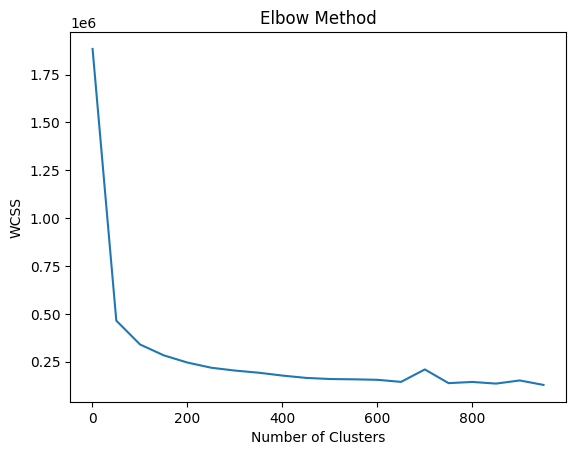

In [86]:
wcss = []
for i in range(1, 1000, 50):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=2023, n_init='auto', max_no_improvement=2)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 1000, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

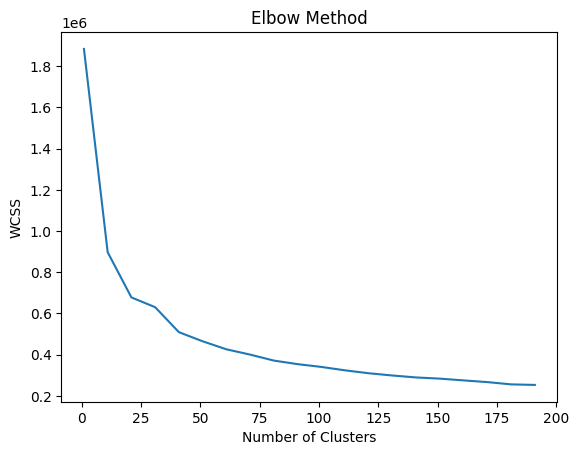

In [87]:
wcss = []
for i in range(1, 200, 10):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=2023, n_init='auto', max_no_improvement=2)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 200, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
dict(zip(range(1,200,10),wcss))

{1: 1883916.036462807,
 11: 897014.2024947362,
 21: 677691.2847967483,
 31: 630357.3384198277,
 41: 509098.75655492954,
 51: 464838.0202106297,
 61: 425913.4092645687,
 71: 400238.633564713,
 81: 371204.7753754149,
 91: 353860.2726544807,
 101: 340381.3570454625,
 111: 323804.9338614022,
 121: 309675.3431786436,
 131: 298733.4674045724,
 141: 289253.41742155165,
 151: 283491.2278428195,
 161: 274950.0061331851,
 171: 266668.87882123207,
 181: 255667.62276149716,
 191: 253008.19269445544}

Choosing 21 clusters as that is the knee where the slope starts becoming flat significantly

In [266]:
# Create MiniBatchKMeans object
kmeans = MiniBatchKMeans(n_clusters=21, batch_size=2000, random_state=2023, n_init='auto')

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels
labels = kmeans.labels_

# Combine the cluster labels and the target variable into a single DataFrame
results = pd.DataFrame({'Cluster': labels, 'Target': y_train})

# Convert 'Cluster' column into one-hot encoding
cluster_one_hot = pd.get_dummies(results['Cluster'], prefix='Cluster')

y_train_cluster = cluster_one_hot.copy()

y_train_cluster['Target'] = y_train

In [267]:
# predict clusters for X_test
test_cluster_labels = kmeans.predict(X_test)

test_cluster_results = pd.DataFrame({'Cluster': test_cluster_labels, 'Target': y_test})

# Convert 'Cluster' column into one-hot encoding
test_cluster_one_hot = pd.get_dummies(test_cluster_results['Cluster'], prefix='Cluster')

X_test_cluster = pd.concat([X_test, test_cluster_one_hot], axis=1)

In [268]:
clf = DecisionTreeClassifier(max_depth=70, random_state=0)
clf.fit(y_train_cluster.drop('Target', axis=1), y_train_cluster['Target'])
importances_in_clusters = clf.feature_importances_

In [269]:
important_clusters = dict(zip(y_train_cluster.columns,importances_in_clusters))
important_clusters = dict(sorted(important_clusters.items(), key=lambda x: x[1], reverse=True))
print(important_clusters)

{'Cluster_15': 0.3697001912143464, 'Cluster_17': 0.29305189682389526, 'Cluster_6': 0.16071281855867312, 'Cluster_4': 0.13405129754064982, 'Cluster_20': 0.018389702485763312, 'Cluster_13': 0.013064580047065392, 'Cluster_19': 0.007986142553318084, 'Cluster_7': 0.001365164964703179, 'Cluster_3': 0.00044470945846170767, 'Cluster_1': 0.00028164871785700773, 'Cluster_18': 0.00023752892300459892, 'Cluster_11': 0.0001420524991300652, 'Cluster_10': 0.000137333430143507, 'Cluster_2': 0.00013568796864106973, 'Cluster_14': 0.00012545640735604945, 'Cluster_5': 0.00010650895566164805, 'Cluster_8': 4.8630056546930224e-05, 'Cluster_12': 1.771787847183066e-05, 'Cluster_16': 8.110804083086739e-07, 'Cluster_9': 1.2043590268748513e-07, 'Cluster_0': 0.0}


In [270]:
np.cumsum(list(important_clusters.values()))

array([0.36970019, 0.66275209, 0.82346491, 0.9575162 , 0.97590591,
       0.98897049, 0.99695663, 0.99832179, 0.9987665 , 0.99904815,
       0.99928568, 0.99942773, 0.99956507, 0.99970076, 0.99982621,
       0.99993272, 0.99998135, 0.99999907, 0.99999988, 1.        ,
       1.        ])

Text(0, 0.5, 'Importance of cumulative features')

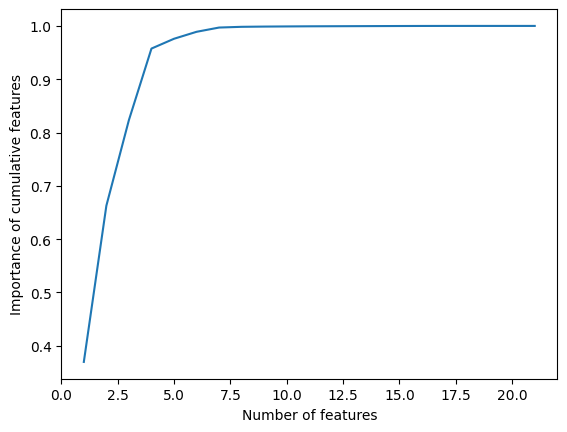

In [271]:
plt.plot(range(1, len(y_train_cluster.columns)), np.cumsum(list(important_clusters.values())))
plt.xlabel("Number of features")
plt.ylabel("Importance of cumulative features")

In [272]:
best_clusters = list(important_clusters.keys())[:np.argmax(np.cumsum(list(important_clusters.values())) >= 0.98)+1]
best_clusters

['Cluster_15',
 'Cluster_17',
 'Cluster_6',
 'Cluster_4',
 'Cluster_20',
 'Cluster_13']

In [313]:
def custom_ensemble_2(X,y, X_val, y_val):
  
  # Create MiniBatchKMeans object
  kmeans = MiniBatchKMeans(n_clusters=21, batch_size=1000, random_state=2023, n_init='auto')

  # Fit the model to the data
  kmeans.fit(X)

  # Get the cluster labels
  labels = kmeans.labels_

  # Combine the cluster labels and the target variable into a single DataFrame
  results = pd.DataFrame({'Cluster': labels, 'Target': y})

  # Convert 'Cluster' column into one-hot encoding
  cluster_one_hot = pd.get_dummies(results['Cluster'], prefix='Cluster')

  # Concatenate the best one-hot encoded 'Cluster' feature to X
  X_with_cluster = pd.concat([X, cluster_one_hot[best_clusters]], axis=1)
  # X_with_cluster = cluster_one_hot[best_clusters]

  # predict clusters for X_test
  test_cluster_labels = kmeans.predict(X_val)

  val_cluster_results = pd.DataFrame({'Cluster': test_cluster_labels, 'Target': y_val})

  # Convert 'Cluster' column into one-hot encoding
  val_cluster_one_hot = pd.get_dummies(val_cluster_results['Cluster'], prefix='Cluster')

  # Concatenate the best one-hot encoded 'Cluster' feature to X_val
  X_val_cluster = pd.concat([X_val, val_cluster_one_hot[best_clusters]], axis=1)
  # X_val_cluster = val_cluster_one_hot[best_clusters]

  # Compute the mean target value for each cluster
  mean_target = results.groupby('Cluster')['Target'].mean()

  # Numer of people who died vs number of who survived 
  # for label in np.unique(labels):
  #   print(f"\nCluster {label}:\n # dead: ",results[(results.Cluster == label) & (results.Target == 1)].shape[0],
  #         " vs # not dead: ",
  #         results[(results.Cluster == label) & (results.Target == 0)].shape[0])
    
  print("\n",mean_target,"\n")
  
  # Define individual classifiers
  #'entropy', 'best', mdepth=5, clweight=None, minleaf=10
  clf1 = make_pipeline(LogisticRegression(penalty='l1', solver='liblinear'))
  clf2 = make_pipeline(LogisticRegression(penalty='l1', solver='liblinear'))
  clf3 = make_pipeline(DecisionTreeClassifier(random_state=2023, max_depth=5,
                                              criterion='entropy', 
                                              splitter='best',
                                              min_samples_leaf=10,
                                              max_features="log2"))
  clf4 = make_pipeline(DecisionTreeClassifier(random_state=2023, max_depth=5,
                                              criterion='entropy', 
                                              splitter='best',
                                              min_samples_leaf=10,
                                              max_features="log2"))
  # Fit classifiers on masked data
  clf1.fit(X_with_cluster, y)
  clf2.fit(X_with_cluster, y)
  clf3.fit(X_with_cluster, y)
  clf4.fit(X_with_cluster, y)

  # Define the ensemble model
  ensemble_model = VotingClassifier(estimators=[
      ('clf1', clf1),
      ('clf2', clf2),
      ('clf3', clf3), 
      ('clf4', clf4)], 
      weights=[1, 1, 1, 1],
      voting = 'soft'
      )

  ensemble_model.fit(X_with_cluster, y)

  # Get the best model and print its accuracy
  y_pred = ensemble_model.predict(X_val_cluster)
  y_pred_proba = ensemble_model.predict_proba(X_val_cluster)
  return y_pred, y_pred_proba




In [314]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)

y_pred, y_pred_proba = custom_ensemble_2(X_train, y_train, X_test, y_test)
print_scoring_reports(y_test, y_pred)


 Cluster
0     0.005863
1     0.034011
2     0.022596
3     0.010598
4     0.183445
5     0.284428
6     0.027404
7     0.011456
8     0.017407
9     0.011272
10    0.045317
11    0.002956
12    0.018857
13    0.498115
14    0.006039
15    0.409343
16    0.006857
17    0.025037
18    0.008211
19    0.109581
20    0.064624
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236795
           1       0.60      0.38      0.46     18619

    accuracy                           0.94    255414
   macro avg       0.77      0.68      0.71    255414
weighted avg       0.93      0.94      0.93    255414

Confusion matrix:
 [[232009   4786]
 [ 11573   7046]]


In [315]:
X_train_feature_reduced, y_train_feature_reduced = shuffle(
    X_train_feature_reduced, y_train_feature_reduced, random_state=19)

y_pred, y_pred_proba = custom_ensemble_2(
    X_train_feature_reduced, y_train_feature_reduced, X_test_feature_reduced, y_test_feature_reduced)

print_scoring_reports(y_test_feature_reduced, y_pred)


 Cluster
0     0.052503
1     0.002206
2     0.029146
3     0.592275
4     0.012320
5     0.009760
6     0.330579
7     0.368028
8     0.003982
9     0.018944
10    0.019793
11    0.005182
12    0.010400
13    0.403732
14    0.059196
15    0.217304
16    0.016724
17    0.105204
18    0.051320
19    0.003277
20    0.422628
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236643
           1       0.59      0.38      0.46     18771

    accuracy                           0.93    255414
   macro avg       0.77      0.68      0.71    255414
weighted avg       0.92      0.93      0.93    255414

Confusion matrix:
 [[231633   5010]
 [ 11708   7063]]


In [316]:
y_pred, y_pred_proba = custom_ensemble_2(X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print_scoring_reports(y_test, y_pred)


 Cluster
0     0.383219
1     0.121722
2     0.019521
3     0.727496
4     0.769663
5     0.033339
6     0.896028
7     0.780749
8     0.055729
9     0.845062
10    0.048812
11    0.045278
12    0.058522
13    0.695385
14    0.048788
15    0.262702
16    0.790846
17    0.822934
18    0.068489
19    0.843422
20    0.794584
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236795
           1       0.40      0.92      0.55     18619

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.75    255414
weighted avg       0.95      0.89      0.91    255414

Confusion matrix:
 [[210814  25981]
 [  1522  17097]]


In [317]:
y_pred, y_pred_proba = custom_ensemble_2(
    X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE, X_test_feature_reduced, y_test_feature_reduced )
print_scoring_reports(y_test_feature_reduced, y_pred)


 Cluster
0     0.722135
1     0.817723
2     0.084988
3     0.013824
4     0.872711
5     0.098963
6     0.112863
7     0.552042
8     0.050719
9     0.772115
10    0.670600
11    0.064049
12    0.036023
13    0.025022
14    0.109364
15    0.791434
16    0.267145
17    0.830530
18    0.887515
19    0.888115
20    0.635209
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.99      0.91      0.94    236643
           1       0.41      0.84      0.55     18771

    accuracy                           0.90    255414
   macro avg       0.70      0.87      0.75    255414
weighted avg       0.94      0.90      0.92    255414

Confusion matrix:
 [[214499  22144]
 [  3064  15707]]


New resampling of data to check if resampling helps as it increased the precision values in above model

In [310]:
X_train_SMOTE1, y_train_SMOTE1 = data_sampling_smote(X_train, y_train, 0.49, 0.51)

In [318]:
y_train_SMOTE1.mean()

0.3377481522735447

In [319]:
y_pred, y_pred_proba = custom_ensemble_2(
    X_train_SMOTE1, y_train_SMOTE1, X_test, y_test )

print_scoring_reports(y_test, y_pred)


 Cluster
0     0.024218
1     0.133577
2     0.841514
3     0.082535
4     0.902258
5     0.036417
6     0.017384
7     0.708955
8     0.026940
9     0.809633
10    0.357220
11    0.215969
12    0.154807
13    0.029404
14    0.858053
15    0.791979
16    0.452098
17    0.766820
18    0.865119
19    0.718255
20    0.104966
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236795
           1       0.40      0.92      0.55     18619

    accuracy                           0.89    255414
   macro avg       0.69      0.91      0.75    255414
weighted avg       0.95      0.89      0.91    255414

Confusion matrix:
 [[210492  26303]
 [  1406  17213]]


#____________________________________-END-____________________________________

We have chosen 3 ML models for hyper parameter tuning and model selection
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the pipeline
pipe = Pipeline([
    ('clf', None),
])

# Define the hyperparameters for each estimator in the pipeline
param_grid = [
    {
        'clf': [LogisticRegression(max_iter = 1000, solver='saga', penalty='l1')],
        # 'clf__penalty': ['l1', 'l2'],
        # 'clf__C': [0.1, 1, 10]
    },
    {
        'clf': [RandomForestClassifier()],
        # 'clf__n_estimators': [50, 100, 200],
        # 'clf__max_depth': [5, 10, 15]
    },
    {
        'clf': [XGBClassifier()],
        # 'clf__learning_rate': [0.1, 0.01, 0.001],
        # 'clf__n_estimators': [50, 100, 200]
    }
]

# Create the grid search object
grid_SMOTE = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5, n_jobs =-1)
grid_resampled = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)
grid_balanced = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)

# Fit the grid search to the data
grid_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
grid_resampled.fit(X_train_resampled, y_train_resampled)
grid_balanced.fit(X_train_balanced, y_train_balanced)


In [ ]:
print("Best estimator: ", grid_SMOTE.best_estimator_)
print("Best score: ", grid_SMOTE.best_score_)
pd.DataFrame(grid_SMOTE.cv_results_)

In [ ]:
print("Best estimator: ", grid_resampled.best_estimator_)
print("Best score: ", grid_resampled.best_score_)
pd.DataFrame(grid_resampled.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8821514618107079


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,4.338557,1.057089,0.302571,0.180613,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.856346,0.856945,0.857972,0.856101,...,0.001115,3,0.892968,0.892825,0.893960,0.892318,0.894688,0.893352,0.000854,3
1,110.509135,12.460130,5.400821,0.646187,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.881998,0.881311,0.882203,0.881856,...,0.000686,1,0.908696,0.907616,0.908822,0.908237,0.909723,0.908619,0.000696,1
2,183.471700,28.732769,0.901810,0.338936,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.876492,0.875922,0.877432,0.876475,...,0.000882,2,0.904302,0.903424,0.904720,0.903907,0.905687,0.904408,0.000770,2


In [ ]:
print("Best estimator: ", grid_balanced.best_estimator_)
print("Best score: ", grid_balanced.best_score_)
pd.DataFrame(grid_balanced.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8770801443115055


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2.716295,0.587460,0.184176,0.050725,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.851892,0.852909,0.853443,0.852598,...,0.000503,3,0.892342,0.893790,0.893364,0.893175,0.893844,0.893303,0.000543,3
1,113.175412,7.890014,6.037515,0.508383,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.876545,0.876917,0.877102,0.877382,...,0.000330,1,0.907160,0.908091,0.907428,0.908085,0.908480,0.907849,0.000482,1
2,186.847289,18.719829,0.748719,0.115247,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.870915,0.871208,0.871410,0.872325,...,0.000688,2,0.902683,0.903620,0.903018,0.903766,0.904781,0.903574,0.000721,2


In [ ]:
print(grid_SMOTE.best_estimator_.score(X_val,y_val),"\n",grid_resampled.best_estimator_.score(X_val,y_val),
      "\n", grid_balanced.best_estimator_.score(X_val,y_val))

0.8913320096202249 
 0.8942404496895799 
 0.8966455059007774


In [ ]:
# put models in dictionary

models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9365588187793336,
 'Random Forest': 0.9357953516598069}

## Model Comparision

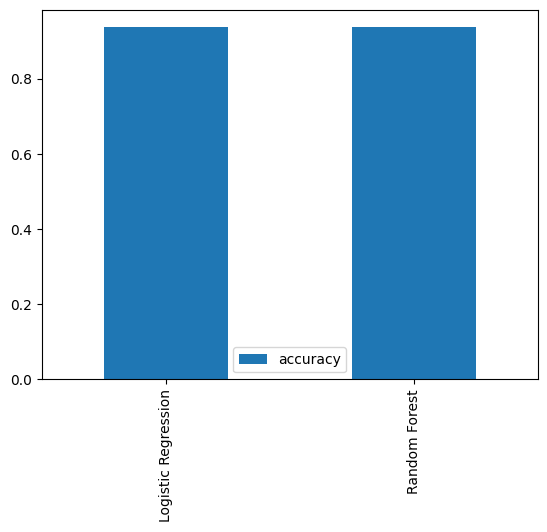

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();